In [2]:
pip install tensorflow


     |████████████████████████████████| 320.4 MB 12 kB/s s eta 0:00:01    |█████████▍                      | 93.5 MB 53.7 MB/s eta 0:00:05           | 95.3 MB 53.7 MB/s eta 0:00:05     |██████████████▍                 | 144.2 MB 37.6 MB/s eta 0:00:05�████████████       | 249.8 MB 31.0 MB/s eta 0:00:03��██████████████████▏     | 262.2 MB 31.0 MB/s eta 0:00:02��███     | 270.7 MB 31.0 MB/s eta 0:00:02██████████████████    | 280.7 MB 24.2 MB/s eta 0:00:02��███████████▎| 312.9 MB 24.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 1.3 MB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 26.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 34.4 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 32.3 MB/s eta 0:00:01 | 17.0 MB 32.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 16.7 MB

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.compat.v1.disable_eager_execution()
#disable_v2_behaviour()

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
print( "Training data: {}, {}" .format(train_images.shape, train_labels.shape))
# prints Training data: (60000, 28, 28), (60000,)
print( "Test data: {}, {}" .format(test_images.shape, test_labels.shape))
# prints Test data: (10000, 28, 28), (10000,) 


Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)


In [8]:
class_labels = np.unique(train_labels)
print( "There are {} classes in the dataset. They are: {}" .format(len(class_labels),
class_labels))
# prints There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9] 

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


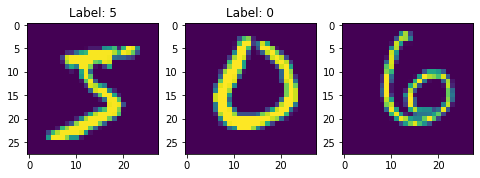

In [9]:
plt.figure(figsize=( 8 , 5 ))
plt.subplot( 1 , 3 , 1 )
plt.imshow(train_images[ 0 ])
plt.title( "Label: {}" .format(train_labels[ 0 ])) 

plt.subplot( 1 , 3 , 2 )
plt.imshow(train_images[ 2500 ])
plt.title( "Label: {}" .format(train_labels[ 2500 ]))

plt.subplot( 1 , 3 , 3 )
plt.imshow(test_images[ 100 ])
#plt.title( "Label: {}" .format(train_labels[ 100 ]))

plt.show()

In [10]:
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values
#range from 0 to 255.
# Dividing the data by 255 scales to the required range
train_images = train_images / 255.0
test_images = test_images / 255.0 

In [12]:
# Split training data to training and validation sets.
x_train = train_images[ 0 : 50000 ]
x_val = train_images[ 50000 :]
y_train = train_labels[ 0 : 50000 ]
y_val = train_labels[ 50000 :] 

In [13]:
print( "x_train: {}" .format(x_train.shape)) # prints x_train: (50000, 28, 28)
print( "x_val: {}" .format(x_val.shape)) # prints x_val: (10000, 28, 28)
print( "y_train: {}" .format(y_train.shape)) #prints y_train: (50000,)
print( "y_val: {}" .format(y_val.shape)) #prints y_val: (10000,) 


x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [17]:
# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[ 1 :]) 
x_train = x_train.reshape(x_train.shape[ 0 ], new_dimension)
x_val = x_val.reshape(x_val.shape[ 0 ], new_dimension)
test_images = test_images.reshape(test_images.shape[ 0 ], new_dimension) 

In [16]:
print( "x_train: {}" .format(x_train.shape)) #prints x_train: (50000, 784)
print( "x_val: {}" .format(x_val.shape)) #prints x_val: (10000, 784)
print( "test_images: {}" .format(test_images.shape)) #prints test_images: (10000, 784) 

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [18]:
#Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [19]:
# inputs
#placeholders are not enabled in tf 2
X = tf.placeholder(tf.float32, [ None , new_dimension])
Y = tf.placeholder(tf.float32, [ None , no_labels]) 

In [31]:
#Create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
    #first layer

    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros(first_layer_neurons))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(X,first_weight), first_bias))



    #second layer
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))

    # output layer
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons,no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    
    logits = tf.add(tf.matmul(second_layer_output,final_weight), final_bias)

    return logits

In [32]:
logits = multilayer_perceptron(X, no_labels)

learning_rate = 0.01

In [33]:
#define the loss and optimizer for the network
losss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(losss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [36]:
#initialize the variables

init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train)// batch_size

In [38]:
#train model
with tf.Session() as session:
    session.run(init)

    for epoch in range(epochs):
        average_cost =0
        start, end = 0, batch_size

        for i in range(iteration):
            batch_x, batch_y = x_train[start: end], y_train[start: end]
            _, loss = session.run([train_op, losss_op], feed_dict={X: batch_x, Y: batch_y})
            start += batch_size
            end += batch_size 
            #average loss
            average_cost += loss/iteration
    print("Epoch========{}".format(epoch))

Epoch========19


In [43]:
#evaluate model

prediction = tf.nn.softmax(logits)
ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
print("Accuracy: {}".format(accuracy.eval({X: y_val, Y: test_labels},session=sess)))

NameError: name 'sess' is not defined